In [28]:
import pandas as pd
from DS_detector import scan_pix
from DS_Planck_Unet import unet_planck, draw_pic
import numpy as np
from matplotlib import pyplot as plt
from DS_healpix_fragmentation import one_pixel_fragmentation, matr2dict, draw_circles_h
from DS_healpix_fragmentation import pix2radec

In [2]:
model = unet_planck(weights='/home/rt2122/Models/planck_z/model.ep0208-vl0.026899-l0.003223.h5')

In [3]:
res_table, tp, fp = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6, 
                               thr_list=[0.1])

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
matr = one_pixel_fragmentation(2, 6, 10)

In [5]:
mdict = matr2dict(matr)

In [6]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [7]:
found_cl_pic = draw_circles_h(tp['RA'], tp['DEC'], 
                              np.ones(tp.shape[0]),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1])

In [8]:
all_cl_pic = draw_circles_h(planck_z['RA'], planck_z['DEC'], 
                              np.ones(planck_z.shape[0]),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1])

In [9]:
grids = np.zeros(found_cl_pic.shape)
for i in range(0, grids.shape[0], 64):
    grids[i,:,0] = 1
    grids[i+1,:,0] = 1
    grids[:,i,0] = 1
    grids[:,i+1,0] = 1

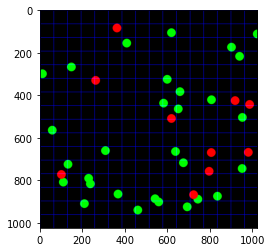

In [11]:
plt.imshow(np.dstack([found_cl_pic, all_cl_pic-found_cl_pic, grids]))

In [17]:
ra, dec = pix2radec(fp, nside=2048) 

In [24]:
fp_pic = draw_circles_h(ra, dec, 
                              np.ones(len(ra)),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1], coef=0.01)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


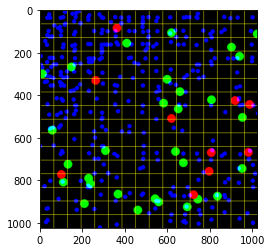

In [27]:
plt.imshow(np.dstack([found_cl_pic + grids, all_cl_pic-found_cl_pic + grids, fp_pic]))

In [29]:
big_pic = draw_pic(matr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


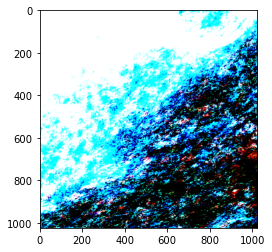

In [31]:
plt.imshow(big_pic[:,:,3:])

In [34]:
def select_small_square(x, y, pic):
    pic = np.copy(pic)
    pic[x*64:(x+1)*64, y*64:(y+1)*64,:]+=0.5
    return pic

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


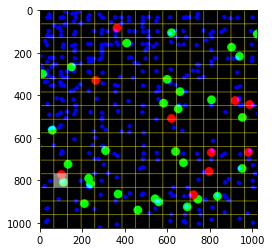

In [36]:
plt.imshow(select_small_square(12, 1, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))

In [40]:
x = 12
y = 1 

In [53]:
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


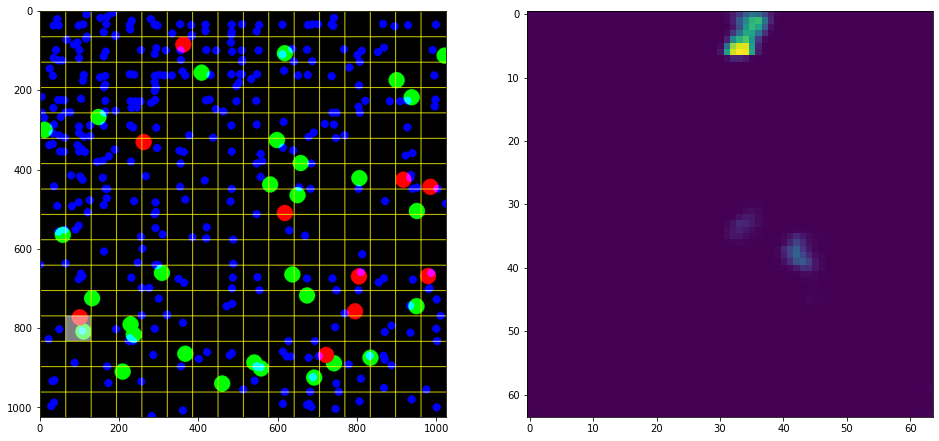

In [59]:
x, y = 12, 1
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))
ax[1].imshow(ans[0,:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


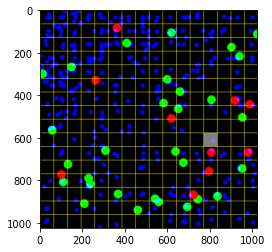

In [46]:
x, y = 9, 12
plt.imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))

In [55]:
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


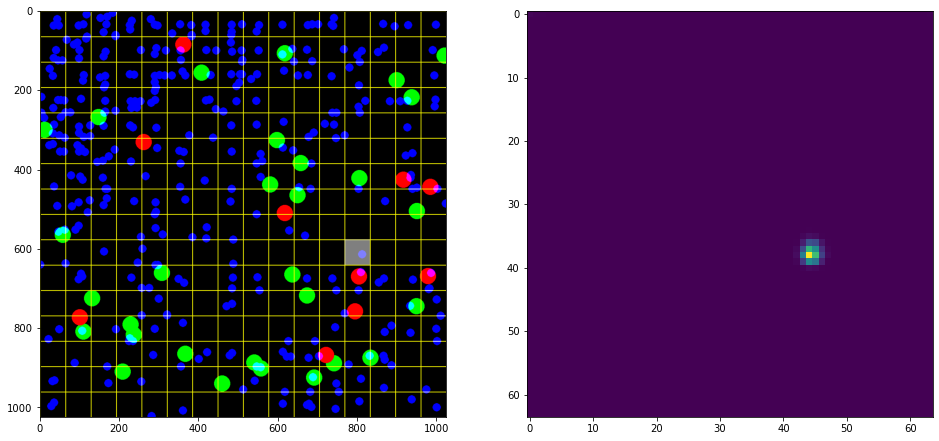

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))
ax[1].imshow(ans[0,:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


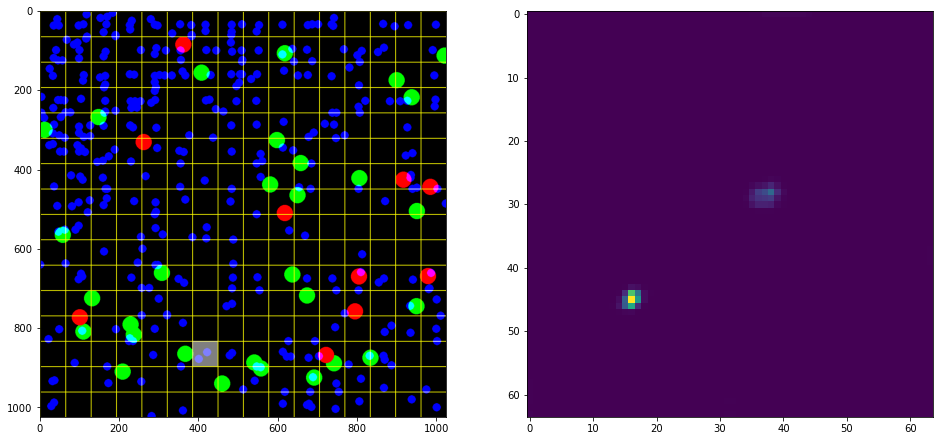

In [57]:
x, y = -3, 6
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))
ax[1].imshow(ans[0,:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


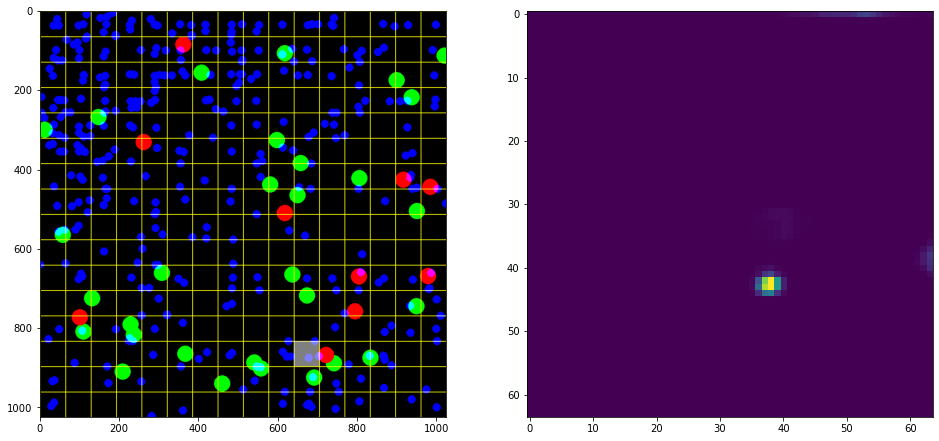

In [58]:
x, y = -3, -6
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))
ax[1].imshow(ans[0,:,:,0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


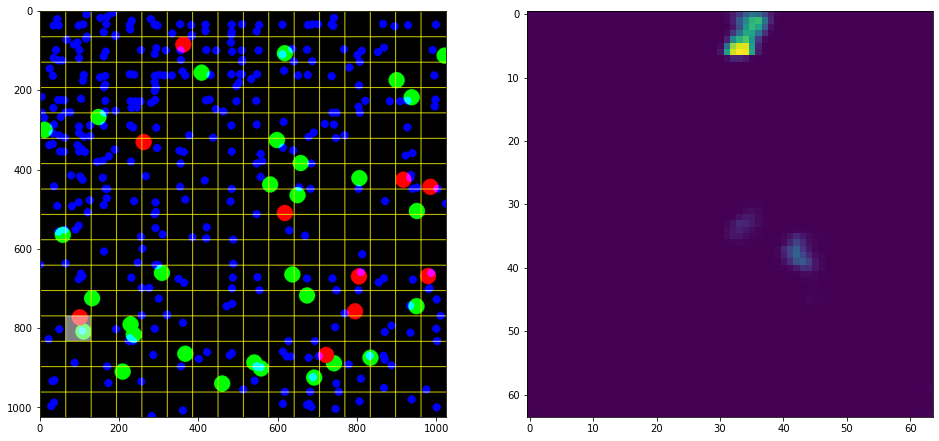

In [61]:
x, y = -4, 1
ans = model.predict(np.array([big_pic[x*64:(x+1)*64,y*64:(y+1)*64]]))
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(select_small_square(x, y, np.dstack([found_cl_pic + grids, 
                                    all_cl_pic-found_cl_pic + grids, fp_pic])))
ax[1].imshow(ans[0,:,:,0])